In [1]:
#Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import time
from datetime import datetime

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

###STEP1: IMPORTING DATASET

In [3]:
data = pd.read_csv("/content/drive/My Drive/DATASETS_DEEP_LEARNING/usa_election2020/president_county_candidate.csv")
data.head(5) 

,state,county,candidate,party,votes
0,Delaware,Kent County,Joe Biden,DEM,44518
1,Delaware,Kent County,Donald Trump,REP,40976
2,Delaware,Kent County,Jo Jorgensen,LIB,1044
3,Delaware,Kent County,Howie Hawkins,GRN,420
4,Delaware,Kent County,Write-ins,WRI,0


In [4]:
data.columns #check the column of the dataset

Index(['state', 'county', 'candidate', 'party', 'votes'], dtype='object')

In [5]:
data.shape #check the shape of the dataset

(31159, 5)

###Top5 Candidate got more votes

In [7]:
max_voted_candidate=data.groupby('candidate')['votes'].sum()
max_voted_candidate=pd.DataFrame(max_voted_candidate)
max_voted_candidate=max_voted_candidate.sort_values(by='votes',ascending=False)
top5_max_voted_candidate=max_voted_candidate.head(5)
top5_max_voted_candidate=top5_max_voted_candidate.reset_index()
top5_max_voted_candidate

,candidate,votes
0,Joe Biden,76466796
1,Donald Trump,71504965
2,Jo Jorgensen,1752277
3,Howie Hawkins,357084
4,Write-ins,157851


<BarContainer object of 5 artists>

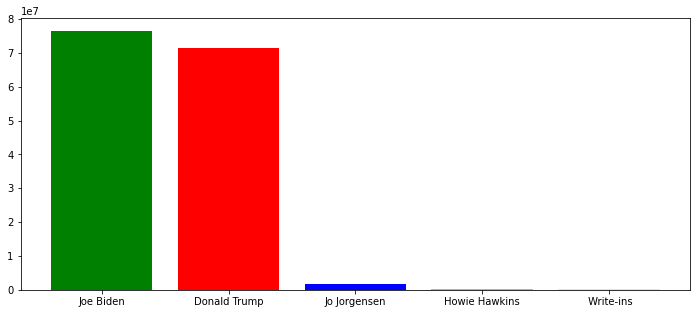

In [8]:
plt.figure(figsize=(12,5))
plt.bar(top5_max_voted_candidate['candidate'],top5_max_voted_candidate['votes'],color=['green','red','blue','cyan','yellow'])

###Top5 parties got more votes

In [9]:
max_voted_party=data.groupby('party')['votes'].sum()
max_voted_party=pd.DataFrame(max_voted_party)
max_voted_party=max_voted_party.sort_values(by='votes',ascending=False)
top5_max_voted_party=max_voted_party.head(5)
top5_max_voted_party=top5_max_voted_party.reset_index()
top5_max_voted_party

,party,votes
0,DEM,76466796
1,REP,71504965
2,LIB,1752277
3,GRN,357994
4,WRI,157851


<BarContainer object of 5 artists>

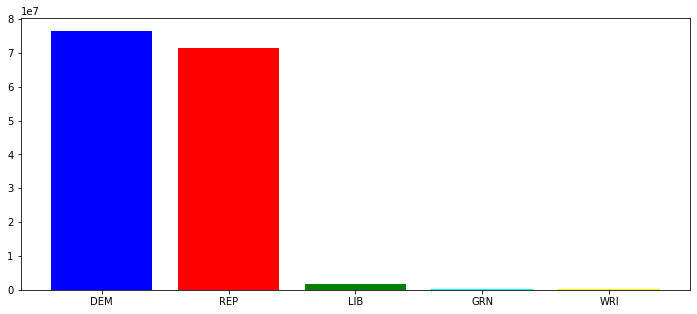

In [10]:
plt.figure(figsize = (12,5))
plt.bar(top5_max_voted_party['party'],top5_max_voted_party['votes'], color=[ 'blue', 'red', 'green', 'cyan', 'yellow'])

In [11]:
#Install folium for generate the world map
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-2p_dh0xh
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-2p_dh0xh
  Created wheel for folium: filename=folium-0.11.0+23.g0a8b9b9-py2.py3-none-any.whl size=97592 sha256=f0c0d00988c142e2f01569e415ef5c702f3a86bc4caa138b2bed56ce76acb3fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-3dkw0y1j/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.11.0+23.g0a8b9b9 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [13]:
import folium

In [14]:
m = folium.Map(
    width='50%', 
    height='50%',
    location=[45.33, -121.69],
    zoom_start=12,
    tiles='Stamen Terrain'
)
folium.PolyLine([[45.3288, -121.6625],[45.3311, -121.7113]]).add_to(m)

m

###USA votes2020 Result map Visualisation

In [16]:
president_state_data=pd.read_csv("/content/drive/My Drive/DATASETS_DEEP_LEARNING/usa_election2020/president_state.csv")
state_code=pd.read_csv("/content/drive/My Drive/DATASETS_DEEP_LEARNING/usa_election2020/world_country_and_usa_states_latitude_and_longitude_values.csv")
datafile=president_state_data.merge(state_code,left_on='state',right_on='usa_state')

In [18]:
datafile.head(5)

,state,votes,electoral_vote,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Delaware,502384,0.0,AO,-11.202692,17.873887,Angola,DE,38.910832,-75.527670,Delaware
1,District of Columbia,279152,0.0,AN,12.226079,-69.060087,Netherlands Antilles,DC,38.905985,-77.033418,District of Columbia
2,Florida,11031440,0.0,AQ,-75.250973,-0.071389,Antarctica,FL,27.664827,-81.515754,Florida
3,Georgia,4983321,0.0,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Georgia
4,Hawaii,573854,0.0,AS,-14.270972,-170.132217,American Samoa,HI,19.898682,-155.665857,Hawaii


In [19]:
fig = px.choropleth(datafile,locations='usa_state_code', color="votes",
                           locationmode = 'USA-states',
                           scope="usa",
                           hover_name="state",
                           title='USA Presidential Votes Counts' 
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


  CONGRATUALTIONS BIDEN FOR WINNING USA ELECTION 2020!!!MORE POWER TO YOU